# Heatmap of Energy usage.

### The main point of this exploration is to get a heatmap result for my personal home energy usage for a short time.
### My whole dataset is from 28/8/2018 to 28/8/2020. For this example (and for image clarity), i've opted to only look at 28/8/2018 to 31/12/2018.

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [195]:
df = pd.read_csv("EnergyAus_28082018_28082020.csv")

# Rounding large floats to 2 decimal. This is to gain insight for heat range later, but also to 
# see what ranges I need to work with going forward. 
# I can see that the max is just under the 2.3 mark.
df.max().round(2)

Date           20200828.00
00:00-00:30           1.40
00:30-01:00           1.33
01:00-01:30           1.18
01:30-02:00           0.60
02:00-02:30           0.45
02:30-03:00           0.40
03:00-03:30           0.43
03:30-04:00           0.41
04:00-04:30           1.01
04:30-05:00           1.17
05:00-05:30           1.26
05:30-06:00           1.72
06:00-06:30           1.52
06:30-07:00           1.51
07:00-07:30           1.76
07:30-08:00           1.96
08:00-08:30           1.67
08:30-09:00           1.70
09:00-09:30           2.20
09:30-10:00           2.23
10:00-10:30           1.82
10:30-11:00           1.81
11:00-11:30           2.00
11:30-12:00           1.81
12:00-12:30           2.02
12:30-13:00           1.82
13:00-13:30           1.76
13:30-14:00           1.71
14:00-14:30           1.46
14:30-15:00           1.64
15:00-15:30           1.67
15:30-16:00           1.90
16:00-16:30           1.83
16:30-17:00           1.82
17:00-17:30           1.82
17:30-18:00           2.09
1

In [196]:
## Checking for NA in the dataset
print(df.isna().any())

Date           False
00:00-00:30    False
00:30-01:00    False
01:00-01:30    False
01:30-02:00    False
02:00-02:30    False
02:30-03:00    False
03:00-03:30    False
03:30-04:00    False
04:00-04:30    False
04:30-05:00    False
05:00-05:30    False
05:30-06:00    False
06:00-06:30    False
06:30-07:00    False
07:00-07:30    False
07:30-08:00    False
08:00-08:30    False
08:30-09:00    False
09:00-09:30    False
09:30-10:00    False
10:00-10:30    False
10:30-11:00    False
11:00-11:30    False
11:30-12:00    False
12:00-12:30    False
12:30-13:00    False
13:00-13:30    False
13:30-14:00    False
14:00-14:30    False
14:30-15:00    False
15:00-15:30    False
15:30-16:00    False
16:00-16:30    False
16:30-17:00    False
17:00-17:30    False
17:30-18:00    False
18:00-18:30    False
18:30-19:00    False
19:00-19:30    False
19:30-20:00    False
20:00-20:30    False
20:30-21:00    False
21:00-21:30    False
21:30-22:00    False
22:00-22:30    False
22:30-23:00    False
23:00-23:30  

In [197]:
# Checking NULLs in the dataset
print(df.isnull().any())

Date           False
00:00-00:30    False
00:30-01:00    False
01:00-01:30    False
01:30-02:00    False
02:00-02:30    False
02:30-03:00    False
03:00-03:30    False
03:30-04:00    False
04:00-04:30    False
04:30-05:00    False
05:00-05:30    False
05:30-06:00    False
06:00-06:30    False
06:30-07:00    False
07:00-07:30    False
07:30-08:00    False
08:00-08:30    False
08:30-09:00    False
09:00-09:30    False
09:30-10:00    False
10:00-10:30    False
10:30-11:00    False
11:00-11:30    False
11:30-12:00    False
12:00-12:30    False
12:30-13:00    False
13:00-13:30    False
13:30-14:00    False
14:00-14:30    False
14:30-15:00    False
15:00-15:30    False
15:30-16:00    False
16:00-16:30    False
16:30-17:00    False
17:00-17:30    False
17:30-18:00    False
18:00-18:30    False
18:30-19:00    False
19:00-19:30    False
19:30-20:00    False
20:00-20:30    False
20:30-21:00    False
21:00-21:30    False
21:30-22:00    False
22:00-22:30    False
22:30-23:00    False
23:00-23:30  

In [199]:
# Splitting Day/Month/Year for better navigation of the data, then converting them back to ints

df['Year'] = df['Date'].astype(str).str[0:4]
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Date'].astype(str).str[4:6]
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Date'].astype(str).str[6:8]
df['Day'] = df['Day'].astype(int)

df_2018 = df[df['Year'] == 2018]

In [167]:
# Setting 'ActualDate' which combines the Day/Month/Year in a better format.
df_2018['ActualDate'] = df_2018['Day'].map(str) + '-' + df_2018['Month'].map(str) + '-' + df_2018['Year'].map(str)
df_2018['ActualDate']

0       28-8-2018
1       29-8-2018
2       30-8-2018
3       31-8-2018
4        1-9-2018
          ...    
121    27-12-2018
122    28-12-2018
123    29-12-2018
124    30-12-2018
125    31-12-2018
Name: ActualDate, Length: 126, dtype: object

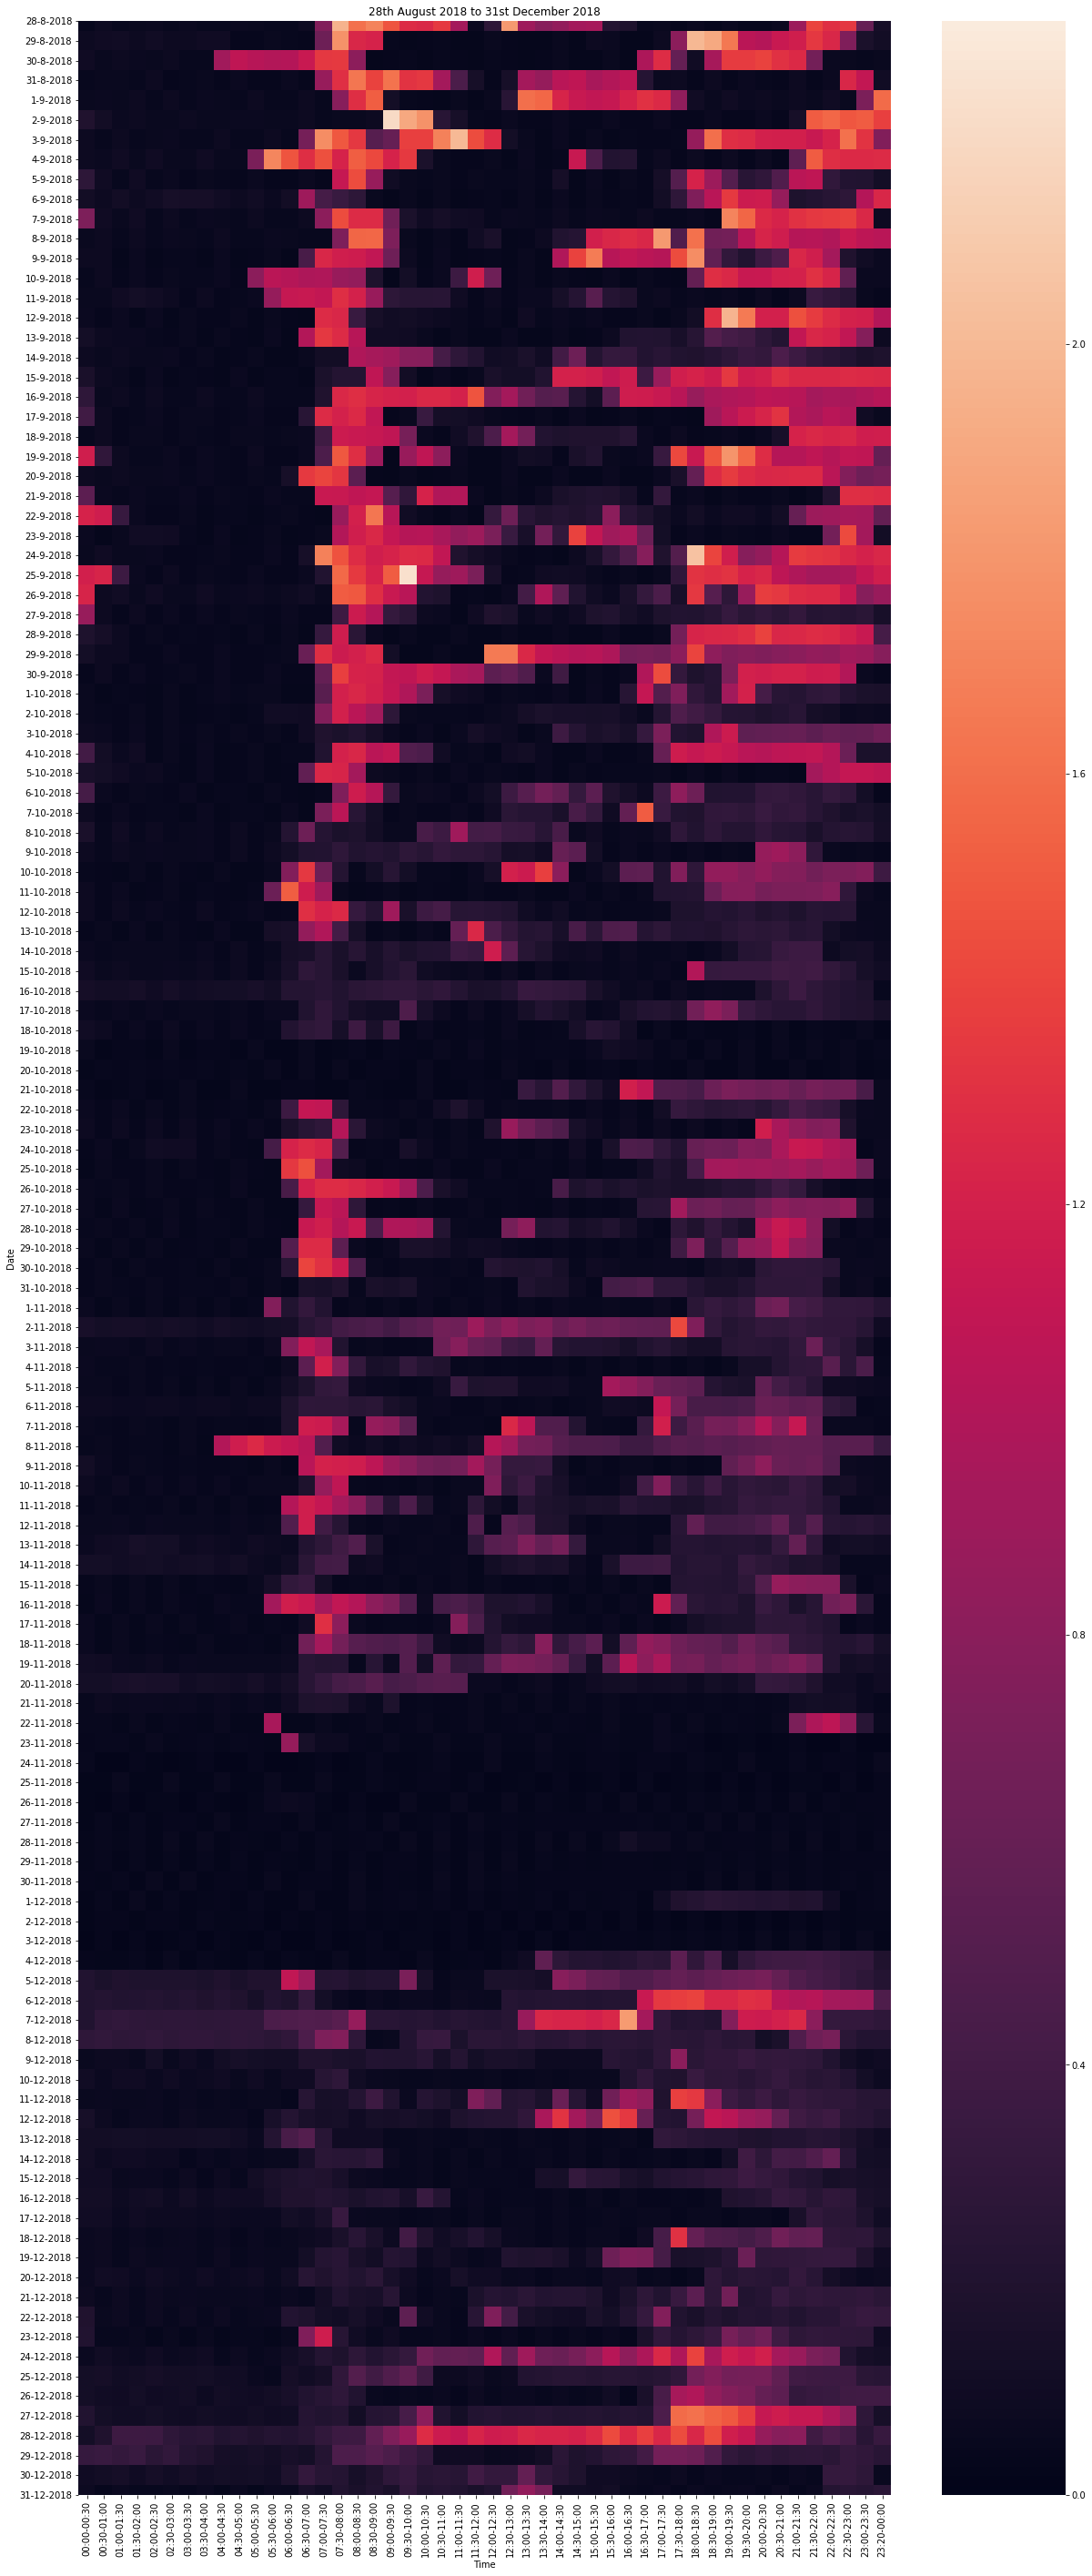

In [193]:
# Plotting as a heatmap with my column names and settings.
plt.figure(figsize=(20,50))
sns.heatmap(df_2018.round(2)[['00:00-00:30',
 '00:30-01:00',
 '01:00-01:30',
 '01:30-02:00',
 '02:00-02:30',
 '02:30-03:00',
 '03:00-03:30',
 '03:30-04:00',
 '04:00-04:30',
 '04:30-05:00',
 '05:00-05:30',
 '05:30-06:00',
 '06:00-06:30',
 '06:30-07:00',
 '07:00-07:30',
 '07:30-08:00',
 '08:00-08:30',
 '08:30-09:00',
 '09:00-09:30',
 '09:30-10:00',
 '10:00-10:30',
 '10:30-11:00',
 '11:00-11:30',
 '11:30-12:00',
 '12:00-12:30',
 '12:30-13:00',
 '13:00-13:30',
 '13:30-14:00',
 '14:00-14:30',
 '14:30-15:00',
 '15:00-15:30',
 '15:30-16:00',
 '16:00-16:30',
 '16:30-17:00',
 '17:00-17:30',
 '17:30-18:00',
 '18:00-18:30',
 '18:30-19:00',
 '19:00-19:30',
 '19:30-20:00',
 '20:00-20:30',
 '20:30-21:00',
 '21:00-21:30',
 '21:30-22:00',
 '22:00-22:30',
 '22:30-23:00',
 '23:00-23:30',
 '23:20-00:00']], vmin=0, vmax=2.3, yticklabels=df_2018['ActualDate'])
plt.ylabel('Date')
plt.xlabel('Time')
plt.title('28th August 2018 to 31st December 2018')
plt.show()